In [127]:
import numpy as np
import networkx as nx
import matplotlib.patches as mpatches
from matplotlib import colors
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
import pickle as pk
import csv

In [2]:
# district number
DISTRICT_NUM = 8
# county width
ASSIGN_W = 5
# county height
ASSIGN_H = 4

popBound = 0.05


# creat district set
district = []
districtSet = []
for idx in range(DISTRICT_NUM):
    district.append("d"+str(idx+1))
    districtSet.append("d"+str(idx+1))
nodes = []
for idx in range(ASSIGN_W):
    for jdx in range(ASSIGN_H):
        nodes.append("n_x{}_y{}".format(idx,jdx))

In [5]:
# construct adjacency data
adjList = []
for i in range(ASSIGN_W):
    for j in range(ASSIGN_H):
        # right adj
        if i + 1 < ASSIGN_W:
            adjList.append(["n_x{}_y{}".format(i,j),"n_x{}_y{}".format(i+1,j)])
        # up adj
        if j + 1 < ASSIGN_H:
            adjList.append(["n_x{}_y{}".format(i,j),"n_x{}_y{}".format(i,j+1)])
            
# construct node position
position = {}
population = {}
totalPop = 0
unitNumber = {} #used to count the units in it
for idx in range(ASSIGN_W):
    for jdx in range(ASSIGN_H):
        position["n_x{}_y{}".format(idx,jdx)] = (0.5+1*idx, 0.5+1*jdx)

        population["n_x{}_y{}".format(idx,jdx)] = random.randrange(10,300)
            
        totalPop += population["n_x{}_y{}".format(idx,jdx)]
        unitNumber["n_x{}_y{}".format(idx,jdx)] = 1
        
interval = 2*(totalPop/DISTRICT_NUM)*popBound

In [7]:
G = nx.Graph()
G.add_edges_from(adjList)

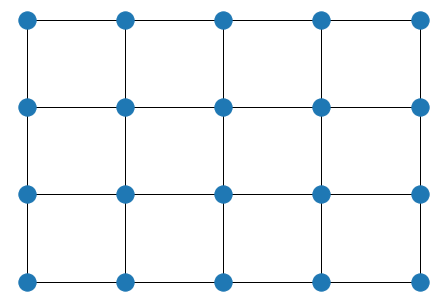

In [9]:
nx.draw(G,pos = position)

In [77]:
category = {0:[], 1:[], 2:[], 3:[]}
for i in position:
    if i == "n_x0_y0" or i == "n_x4_y3":
        category[0].append(i)
    else:
        chosen = random.choices([0,1,2,3], weights=(40, 10, 10, 10), k=1)
        category[chosen[0]].append(i)

In [78]:
category

{0: ['n_x0_y0',
  'n_x0_y1',
  'n_x0_y2',
  'n_x1_y0',
  'n_x1_y1',
  'n_x1_y2',
  'n_x1_y3',
  'n_x2_y2',
  'n_x3_y1',
  'n_x3_y2',
  'n_x3_y3',
  'n_x4_y1',
  'n_x4_y3'],
 1: ['n_x0_y3', 'n_x4_y2'],
 2: ['n_x2_y0', 'n_x2_y1'],
 3: ['n_x2_y3', 'n_x3_y0', 'n_x4_y0']}

In [99]:
edge_weight = {}
num_list = [1,2,3,4,5,6,7,8,9,10]
for e in G.edges:
    edge_weight[e] = random.choice(num_list)

{('n_x0_y0', 'n_x1_y0'): Text(1.0, 0.5, '10'),
 ('n_x0_y0', 'n_x0_y1'): Text(0.5, 1.0, '6'),
 ('n_x1_y0', 'n_x2_y0'): Text(2.0, 0.5, '8'),
 ('n_x1_y0', 'n_x1_y1'): Text(1.5, 1.0, '7'),
 ('n_x0_y1', 'n_x1_y1'): Text(1.0, 1.5, '6'),
 ('n_x0_y1', 'n_x0_y2'): Text(0.5, 2.0, '10'),
 ('n_x1_y1', 'n_x2_y1'): Text(2.0, 1.5, '7'),
 ('n_x1_y1', 'n_x1_y2'): Text(1.5, 2.0, '2'),
 ('n_x0_y2', 'n_x1_y2'): Text(1.0, 2.5, '3'),
 ('n_x0_y2', 'n_x0_y3'): Text(0.5, 3.0, '6'),
 ('n_x1_y2', 'n_x2_y2'): Text(2.0, 2.5, '7'),
 ('n_x1_y2', 'n_x1_y3'): Text(1.5, 3.0, '5'),
 ('n_x0_y3', 'n_x1_y3'): Text(1.0, 3.5, '5'),
 ('n_x1_y3', 'n_x2_y3'): Text(2.0, 3.5, '4'),
 ('n_x2_y0', 'n_x3_y0'): Text(3.0, 0.5, '4'),
 ('n_x2_y0', 'n_x2_y1'): Text(2.5, 1.0, '3'),
 ('n_x2_y1', 'n_x3_y1'): Text(3.0, 1.5, '7'),
 ('n_x2_y1', 'n_x2_y2'): Text(2.5, 2.0, '9'),
 ('n_x2_y2', 'n_x3_y2'): Text(3.0, 2.5, '7'),
 ('n_x2_y2', 'n_x2_y3'): Text(2.5, 3.0, '6'),
 ('n_x2_y3', 'n_x3_y3'): Text(3.0, 3.5, '3'),
 ('n_x3_y0', 'n_x4_y0'): Text(4.

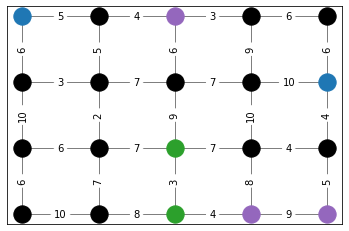

In [138]:
nx.draw_networkx_nodes(G, position, nodelist=category[0],node_color = "#000000")
nx.draw_networkx_nodes(G, position, nodelist=category[1], node_color="tab:blue")
nx.draw_networkx_nodes(G, position, nodelist=category[2], node_color="tab:green")
nx.draw_networkx_nodes(G, position, nodelist=category[3], node_color="tab:purple")
nx.draw_networkx_edges(G, position, width=1.0, alpha=0.5)
nx.draw_networkx_edge_labels(G, position, edge_labels=edge_weight)


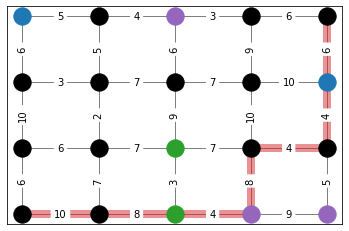

In [142]:
nx.draw_networkx_nodes(G, position, nodelist=category[0],node_color = "#000000")
nx.draw_networkx_nodes(G, position, nodelist=category[1], node_color="tab:blue")
nx.draw_networkx_nodes(G, position, nodelist=category[2], node_color="tab:green")
nx.draw_networkx_nodes(G, position, nodelist=category[3], node_color="tab:purple")
nx.draw_networkx_edges(G, position, width=1.0, alpha=0.5)
nx.draw_networkx_edge_labels(G, position, edge_labels=edge_weight)

nx.draw_networkx_edges(
    G,
    position,
    edgelist=[('n_x0_y0','n_x1_y0'), ('n_x1_y0','n_x2_y0'), ('n_x2_y0','n_x3_y0'), ('n_x3_y0','n_x3_y1'), \
             ('n_x3_y1','n_x4_y1'), ('n_x4_y1','n_x4_y2'), ('n_x4_y2','n_x4_y3')],
    width=8,
    alpha=0.5,
    edge_color="tab:red",
)

In [ ]:
n_x0_y_0   n_x1_y0     n_x2_y0     n_x3_y0     n_x3_y1     n_x4_y1     n_x4_y2     n_x4_y3

In [85]:
edge_label = {('n_x0_y0','n_x0_y1'):1}

In [104]:
list(G.nodes)

['n_x0_y0',
 'n_x1_y0',
 'n_x0_y1',
 'n_x1_y1',
 'n_x0_y2',
 'n_x1_y2',
 'n_x0_y3',
 'n_x1_y3',
 'n_x2_y0',
 'n_x2_y1',
 'n_x2_y2',
 'n_x2_y3',
 'n_x3_y0',
 'n_x3_y1',
 'n_x3_y2',
 'n_x3_y3',
 'n_x4_y0',
 'n_x4_y1',
 'n_x4_y2',
 'n_x4_y3']

In [105]:
arcs = []
for i in G.edges:
    arcs.append(i)
    arcs.append((i[1],i[0]))

In [119]:
arc_file = []
for a in arcs:
    arc_file.append([a[0],a[1],1])

In [128]:
#with open("arcs.csv", "w", newline="") as f:
#    writer = csv.writer(f)
#    writer.writerows(arc_file)

In [120]:
arc_file

[['n_x0_y0', 'n_x1_y0', 1],
 ['n_x1_y0', 'n_x0_y0', 1],
 ['n_x0_y0', 'n_x0_y1', 1],
 ['n_x0_y1', 'n_x0_y0', 1],
 ['n_x1_y0', 'n_x2_y0', 1],
 ['n_x2_y0', 'n_x1_y0', 1],
 ['n_x1_y0', 'n_x1_y1', 1],
 ['n_x1_y1', 'n_x1_y0', 1],
 ['n_x0_y1', 'n_x1_y1', 1],
 ['n_x1_y1', 'n_x0_y1', 1],
 ['n_x0_y1', 'n_x0_y2', 1],
 ['n_x0_y2', 'n_x0_y1', 1],
 ['n_x1_y1', 'n_x2_y1', 1],
 ['n_x2_y1', 'n_x1_y1', 1],
 ['n_x1_y1', 'n_x1_y2', 1],
 ['n_x1_y2', 'n_x1_y1', 1],
 ['n_x0_y2', 'n_x1_y2', 1],
 ['n_x1_y2', 'n_x0_y2', 1],
 ['n_x0_y2', 'n_x0_y3', 1],
 ['n_x0_y3', 'n_x0_y2', 1],
 ['n_x1_y2', 'n_x2_y2', 1],
 ['n_x2_y2', 'n_x1_y2', 1],
 ['n_x1_y2', 'n_x1_y3', 1],
 ['n_x1_y3', 'n_x1_y2', 1],
 ['n_x0_y3', 'n_x1_y3', 1],
 ['n_x1_y3', 'n_x0_y3', 1],
 ['n_x1_y3', 'n_x2_y3', 1],
 ['n_x2_y3', 'n_x1_y3', 1],
 ['n_x2_y0', 'n_x3_y0', 1],
 ['n_x3_y0', 'n_x2_y0', 1],
 ['n_x2_y0', 'n_x2_y1', 1],
 ['n_x2_y1', 'n_x2_y0', 1],
 ['n_x2_y1', 'n_x3_y1', 1],
 ['n_x3_y1', 'n_x2_y1', 1],
 ['n_x2_y1', 'n_x2_y2', 1],
 ['n_x2_y2', 'n_x2_y

In [134]:
edge_file = []
for e in edge_weight:
    edge_file.append([e[0],e[1],edge_weight[e]])
    edge_file.append([e[1],e[0],edge_weight[e]])
    
# with open("edge_weight.csv", "w", newline="") as f:
#     writer = csv.writer(f)
#     writer.writerows(edge_file)

In [133]:
edge_weight

{('n_x0_y0', 'n_x1_y0'): 10,
 ('n_x0_y0', 'n_x0_y1'): 6,
 ('n_x1_y0', 'n_x2_y0'): 8,
 ('n_x1_y0', 'n_x1_y1'): 7,
 ('n_x0_y1', 'n_x1_y1'): 6,
 ('n_x0_y1', 'n_x0_y2'): 10,
 ('n_x1_y1', 'n_x2_y1'): 7,
 ('n_x1_y1', 'n_x1_y2'): 2,
 ('n_x0_y2', 'n_x1_y2'): 3,
 ('n_x0_y2', 'n_x0_y3'): 6,
 ('n_x1_y2', 'n_x2_y2'): 7,
 ('n_x1_y2', 'n_x1_y3'): 5,
 ('n_x0_y3', 'n_x1_y3'): 5,
 ('n_x1_y3', 'n_x2_y3'): 4,
 ('n_x2_y0', 'n_x3_y0'): 4,
 ('n_x2_y0', 'n_x2_y1'): 3,
 ('n_x2_y1', 'n_x3_y1'): 7,
 ('n_x2_y1', 'n_x2_y2'): 9,
 ('n_x2_y2', 'n_x3_y2'): 7,
 ('n_x2_y2', 'n_x2_y3'): 6,
 ('n_x2_y3', 'n_x3_y3'): 3,
 ('n_x3_y0', 'n_x4_y0'): 9,
 ('n_x3_y0', 'n_x3_y1'): 8,
 ('n_x3_y1', 'n_x4_y1'): 4,
 ('n_x3_y1', 'n_x3_y2'): 10,
 ('n_x3_y2', 'n_x4_y2'): 10,
 ('n_x3_y2', 'n_x3_y3'): 9,
 ('n_x3_y3', 'n_x4_y3'): 6,
 ('n_x4_y0', 'n_x4_y1'): 5,
 ('n_x4_y1', 'n_x4_y2'): 4,
 ('n_x4_y2', 'n_x4_y3'): 6}

In [113]:
blue = []
for i in category[1]:
    blue.append([i,1])
green = []
for i in category[2]:
    green.append([i,1])
purple = []
for i in category[3]:
    purple.append([i,1])

In [117]:
purple

[['n_x2_y3', 1], ['n_x3_y0', 1], ['n_x4_y0', 1]]

In [80]:
with open("category.pk", 'wb') as f:
    pk.dump(category,f)

In [82]:
label = G.new_edge_property("string")

AttributeError: 'Graph' object has no attribute 'new_edge_property'

{('n_x0_y0', 'n_x1_y0'): 9,
 ('n_x0_y0', 'n_x0_y1'): 8,
 ('n_x1_y0', 'n_x2_y0'): 3,
 ('n_x1_y0', 'n_x1_y1'): 8,
 ('n_x0_y1', 'n_x1_y1'): 9,
 ('n_x0_y1', 'n_x0_y2'): 3,
 ('n_x1_y1', 'n_x2_y1'): 3,
 ('n_x1_y1', 'n_x1_y2'): 3,
 ('n_x0_y2', 'n_x1_y2'): 5,
 ('n_x0_y2', 'n_x0_y3'): 9,
 ('n_x1_y2', 'n_x2_y2'): 4,
 ('n_x1_y2', 'n_x1_y3'): 9,
 ('n_x0_y3', 'n_x1_y3'): 4,
 ('n_x1_y3', 'n_x2_y3'): 9,
 ('n_x2_y0', 'n_x3_y0'): 5,
 ('n_x2_y0', 'n_x2_y1'): 5,
 ('n_x2_y1', 'n_x3_y1'): 8,
 ('n_x2_y1', 'n_x2_y2'): 3,
 ('n_x2_y2', 'n_x3_y2'): 10,
 ('n_x2_y2', 'n_x2_y3'): 3,
 ('n_x2_y3', 'n_x3_y3'): 6,
 ('n_x3_y0', 'n_x4_y0'): 3,
 ('n_x3_y0', 'n_x3_y1'): 10,
 ('n_x3_y1', 'n_x4_y1'): 8,
 ('n_x3_y1', 'n_x3_y2'): 2,
 ('n_x3_y2', 'n_x4_y2'): 9,
 ('n_x3_y2', 'n_x3_y3'): 7,
 ('n_x3_y3', 'n_x4_y3'): 3,
 ('n_x4_y0', 'n_x4_y1'): 4,
 ('n_x4_y1', 'n_x4_y2'): 6,
 ('n_x4_y2', 'n_x4_y3'): 9}

In [118]:
nodes

['n_x0_y0',
 'n_x0_y1',
 'n_x0_y2',
 'n_x0_y3',
 'n_x1_y0',
 'n_x1_y1',
 'n_x1_y2',
 'n_x1_y3',
 'n_x2_y0',
 'n_x2_y1',
 'n_x2_y2',
 'n_x2_y3',
 'n_x3_y0',
 'n_x3_y1',
 'n_x3_y2',
 'n_x3_y3',
 'n_x4_y0',
 'n_x4_y1',
 'n_x4_y2',
 'n_x4_y3']

In [137]:
green

[['n_x2_y0', 1], ['n_x2_y1', 1]]